In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
N = 10000
Pop = np.zeros(N)
T = 500
PlotPerT = 50
dt = 0.1
Timesteps = int(T/dt)
D = 1

In [3]:
# Plot the current density
def DensityPlot(Pop):
    plt.figure()
    plt.hist(Pop, bins = 200)
    plt.show()
    return

Random movement of the $n^{th}$ individual at timestep $i$: $x^{i+1}_n = x^{i}_n + z^{i}_n$ where $z^{i} \sim \mathcal{N}(\mu, \sigma^2)$\
Here, we choose the Gaussian distribution with $\mu = 0, \sigma = 1$, and $z^{i} \sim \sqrt{Ddt}\cdot\mathcal{N}(0, 1)$

In [4]:
# Monte Carlo Simulation of the random motion of individuals
def RandomWalk(Pop):
    rand_mov = (D*dt)**(1/2)*np.array([random.gauss(0,1) for i in range(len(Pop))])
    Pop = Pop + rand_mov
    
    Pop_new = []
    # Only keep positive real line
    for p in Pop:
        if p > 0:
            Pop_new.append(p)
    
    # Keep density = 1 at the origin
    Pop_new = Pop_new + [0 for i in range(N)]
    
    return np.array(Pop_new) 

In [5]:
# Involve logistic growth, R the coefficient for Rn(1-n)
def LogisticGrowth(Pop, R):
    X = int(max(Pop))
    bin_size = X/200
    
    # Bins record the right boundaries of the bins (from the leftmost to the rightmost)
    Bins = [(i+1)*bin_size for i in range(200)] 
    
    # Bin_pop records the current population inside each bin
    Bin_pop = [0 for i in range(200)]
    
    Pop_sort = np.sort(Pop)
    
    for i in Pop_sort:
        Bin_count = 0
        while i > Bins[Bin_count] and Bin_count < 199:
            Bin_count += 1
        Bin_pop[Bin_count] += 1
    
    for b_num in range(len(Bin_pop)):
        n = Bin_pop[b_num]
        new_birth = np.linspace(b_num*bin_size, (b_num+1)*bin_size, int(R*(n/len(Pop))*(1-n/len(Pop))))
        Pop = np.append(Pop, new_birth)
    
    return Pop

In [6]:
def OriginHelper(Pop):
    Pop_new = np.array(np.nonzero(Pop))
    return np.append(Pop_new, [0 for i in range(N)])

0


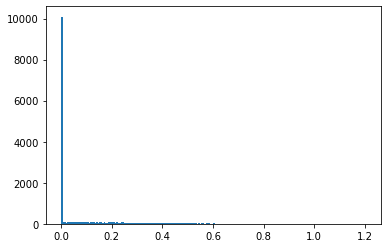

49


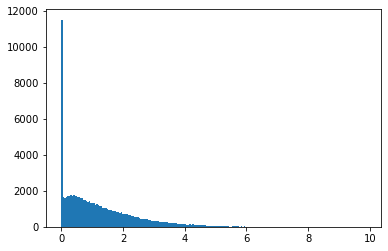

99


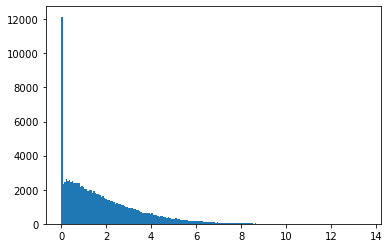

149


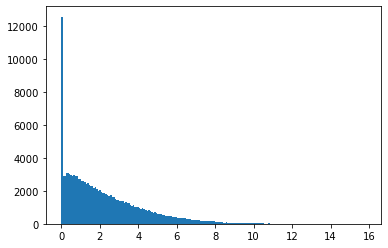

199


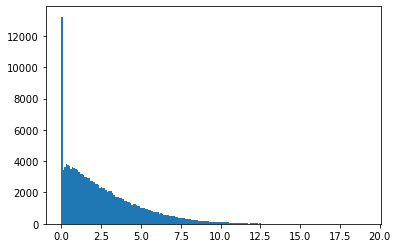

249


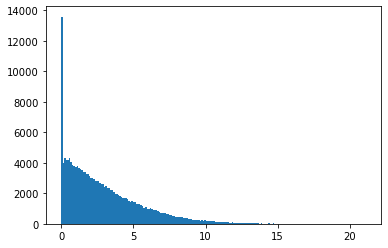

299


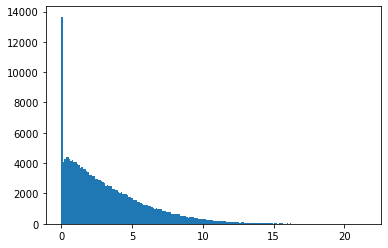

349


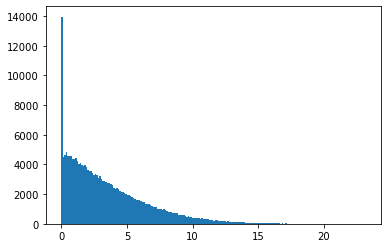

KeyboardInterrupt: 

In [7]:
for t in range(T):
    
    Pop = RandomWalk(Pop)
    Pop = LogisticGrowth(Pop, 2)
#     Pop = OriginHelper(Pop)
#     print(t)
    
    if t == 0 or (t+1)%PlotPerT == 0:
        print(t)
        DensityPlot(Pop)